In [14]:
def analise_viabilidade(fluxo_de_caixa, tma_perc):
    # Importa o método root do módulo optimize da biblioteca NumPy
    from scipy.optimize import root
    # Importa o método log da biblioteca Math
    from math import log

    # Converte a TMA para decimal
    tma = tma_perc / 100

    # Calcula  Valor Presente Líquido (VPL)
    VPL = []
    fcd = 0
    for i in range(len(fluxo_de_caixa)):
        fcd = fluxo_de_caixa[i] / (1 + tma)**i
        VPL.append(fcd)
    fluxo_pos = []
    fluxo_neg = []

    for fcdescont in VPL:
        if fcdescont >=0:
            fluxo_pos.append(fcdescont)
        else:
            fluxo_neg.append(fcdescont)

    VPL_sum = sum(fluxo_pos) + sum(fluxo_neg)
    #print('\n')
    print('\033[1mResumo da Análise de Viabilidade Econômica\033[0m')
    print('\n')
    print(f'O Valor Presente Líquido (VPL) é: ${VPL_sum:,.2f}')
    #print('\n')
    if VPL_sum >= 0:
        print('O projeto é viável, pois o VPL é maior ou igual a zero.')
    else:
        print('O projeto não é viável, pois o VPL é negativo.')
    print('\n')

    # Calcula a Taxa Interna de Retorno (TIR)
    def f(tir, fluxos):
        return sum([fluxo / (1 + tir) ** idx for idx, fluxo in enumerate(fluxos)])

    def calcular_tir(fluxos):
        return root(f, 0, args=(fluxos,))

    sol = calcular_tir(fluxo_de_caixa)
    tir = sol.x[0]
    TIR = tir * 100
    print(f'A Taxa Interna de Retorno (TIR) do projeto é igual a {TIR:,.2f}%')
    #print('\n')
    if TIR >= tma_perc:
        print(f'O projeto é viável, pois a TIR é maior ou igual à TMA de {tma_perc}%.')
    else:
        print(f'O projeto não é viável, pois a TIR é inferior à TMA de {tma_perc}%.')
    print('\n')

    # Calcula o Índice de Lucratividade (IL) ou
    # Índice de Valor Atual (IVA)
    IL = sum(fluxo_pos)/abs(sum(fluxo_neg))
    print(f'O Índice de Lucratividade (IL) do projeto é: {IL:,.2f}')
    #print('\n')

    # Calcula a Taxa de Rentabilidade (TR)
    TR = (IL - 1)*100
    print(f'A Taxa de Rentabilidade (TR) do projeto é: {TR:,.2f}%')
    print('\n')

    # Calcula o Payback Médio
    # Conforme Assaf Neto e Lima (2014)
    numeros_positivos = [num for num in fluxo_de_caixa if num > 0]
    numeros_negativos = [num for num in fluxo_de_caixa if num < 0]
    quantidade_positivos = len(numeros_positivos)
    soma_positivos = sum(numeros_positivos)
    valor_medio_fluxos_positivos = None

    if quantidade_positivos != 0:
        valor_medio_fluxos_positivos = soma_positivos / quantidade_positivos

    soma_abs_negativos = abs(sum(numeros_negativos))
    payback_medio = None
    if valor_medio_fluxos_positivos is not None and valor_medio_fluxos_positivos != 0:
        payback_medio = round(soma_abs_negativos / valor_medio_fluxos_positivos, 2)
    print(f"O tempo de retorno do projeto pelo Payback Médio é igual a {payback_medio} anos")
    #print('\n')

    # Calcula o PaybackTIR
    if TIR > 0:
        Payback_TIR = log(2) / log (1 + TIR/100)
        print(f'O tempo de retorno do projeto pelo PaybackTIR é igual a {Payback_TIR:,.2f} anos')
        #print('\n')

    # Calcula o PaybackTotal ou Duration do projeto
    Payback_Total = (1 / IL) * (len(fluxo_de_caixa)-1)
    print(f'O tempo de retorno do projeto pelo PaybackTotal é igual a {Payback_Total:,.2f} anos')

### Vamos utilizar a função codificada com o exemplo da pág. 394 do capítulo 15 – **Avaliação Econômica de Investimentos**, do livro _Curso de Administração Financeira_, de Alexandre Assaf Neto e Fabiano Guasti Lima (Editora Atlas, 3 ed., 2014).

**Observação**: a Taxa Mínima de Atratividade (**TMA**) neste exemplo é de **20%** ao ano. Isso implica que o investidor deseja obter, no mínimo, esta taxa com o projeto de investimento.

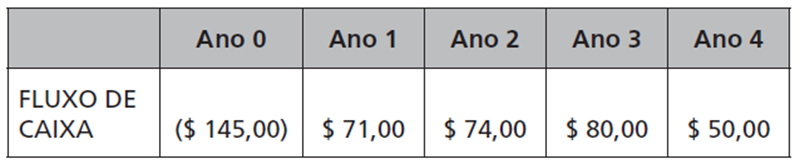

##**Lembretes**:

1) Para rodar a função "**analise_viabilidade**" é preciso executar primeiro a célula anterior.

2) Ao utilizar a função, devem ser passados o fluxo de caixa (na forma de lista em Python) e a TMA, como no exemplo abaixo:
<br><br>
$analise\_viabilidade([-I, FC_{1}, FC_{2}, FC_{3}, ..., FC_{n}], TMA)$
<br><br>
Em que:

$-I$ é o valor do Investimento (ou fluxo de caixa 0).

$FC_{1}, FC_{2}, FC_{3}, ..., FC_{n}$ são os fluxos de caixa 1, 2, 3, ..., n.

$TMA$ é a Taxa Mínima de Atratividade.


## **Atenção**: **não** utilize o símbolo de porcentagem (%) na TMA.

In [15]:
analise_viabilidade([-145, 71, 74, 80, 50], 20)

Resumo da Análise de Viabilidade Econômica


O Valor Presente Líquido (VPL) é: $35.96
O projeto é viável, pois o VPL é maior ou igual a zero.


A Taxa Interna de Retorno (TIR) do projeto é igual a 33.09%
O projeto é viável, pois a TIR é maior ou igual à TMA de 20%.


O Índice de Lucratividade (IL) do projeto é: 1.25
A Taxa de Rentabilidade (TR) do projeto é: 24.80%


O tempo de retorno do projeto pelo Payback Médio é igual a 2.11 anos
O tempo de retorno do projeto pelo PaybackTIR é igual a 2.42 anos
O tempo de retorno do projeto pelo PaybackTotal é igual a 3.21 anos
